In [609]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Algoritmo SVM
from sklearn import svm
from sklearn.svm import SVC

In [610]:
cat_outcomes = pd.read_csv("aac_shelter_cat_outcome_eng.csv")

In [611]:
cat_outcomes.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,...,outcome_weekday,outcome_hour,breed1,breed2,cfa_breed,domestic_breed,coat_pattern,color1,color2,coat
0,2 weeks,A684346,Cat,domestic shorthair,orange,2014-07-07 00:00:00,2014-07-22 16:04:00,2014-07-22T16:04:00,NaN,Partner,...,Tuesday,16,domestic shorthair,NaN,False,True,tabby,orange,NaN,orange
1,1 month,A685067,Cat,domestic shorthair,blue /white,2014-06-16 00:00:00,2014-08-14 18:45:00,2014-08-14T18:45:00,Lucy,NaN,...,Thursday,18,domestic shorthair,NaN,False,True,tabby,blue,white,blue
2,3 months,A678580,Cat,domestic shorthair,white/black,2014-03-26 00:00:00,2014-06-29 17:45:00,2014-06-29T17:45:00,*Frida,Offsite,...,Sunday,17,domestic shorthair,NaN,False,True,NaN,white,black,white
3,1 year,A675405,Cat,domestic mediumhair,black/white,2013-03-27 00:00:00,2014-03-28 14:55:00,2014-03-28T14:55:00,Stella Luna,NaN,...,Friday,14,domestic mediumhair,NaN,False,True,NaN,black,white,black
4,3 weeks,A670420,Cat,domestic shorthair,black/white,2013-12-16 00:00:00,2014-01-09 19:29:00,2014-01-09T19:29:00,NaN,Partner,...,Thursday,19,domestic shorthair,NaN,False,True,NaN,black,white,black


In [612]:
cat_outcomes.dtypes

age_upon_outcome         object
animal_id                object
animal_type              object
breed                    object
color                    object
date_of_birth            object
datetime                 object
monthyear                object
name                     object
outcome_subtype          object
outcome_type             object
sex_upon_outcome         object
count                     int64
sex                      object
Spay/Neuter              object
Periods                   int64
Period Range              int64
outcome_age_(days)        int64
outcome_age_(years)     float64
Cat/Kitten (outcome)     object
sex_age_outcome          object
age_group                object
dob_year                  int64
dob_month                 int64
dob_monthyear            object
outcome_month             int64
outcome_year              int64
outcome_weekday          object
outcome_hour              int64
breed1                   object
breed2                   object
cfa_bree

In [613]:
cat_outcomes.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'count', 'sex', 'Spay/Neuter',
       'Periods', 'Period Range', 'outcome_age_(days)', 'outcome_age_(years)',
       'Cat/Kitten (outcome)', 'sex_age_outcome', 'age_group', 'dob_year',
       'dob_month', 'dob_monthyear', 'outcome_month', 'outcome_year',
       'outcome_weekday', 'outcome_hour', 'breed1', 'breed2', 'cfa_breed',
       'domestic_breed', 'coat_pattern', 'color1', 'color2', 'coat'],
      dtype='object')

In [614]:
cat_outcomes_filtrado = ['age_upon_outcome', 'cfa_breed', 'sex', 'outcome_type']
cat_outcomes = cat_outcomes[cat_outcomes_filtrado]

In [615]:
cat_outcomes.head()

,age_upon_outcome,cfa_breed,sex,outcome_type
0,2 weeks,False,Male,Transfer
1,1 month,False,Female,Adoption
2,3 months,False,Female,Adoption
3,1 year,False,Female,Return to Owner
4,3 weeks,False,Male,Transfer


In [616]:
cat_outcomes['age_upon_outcome'] = cat_outcomes['age_upon_outcome'].astype("string")

def convert_age_to_months(age_str):

    try:
        value = int(age_str.split(' ')[0])
        if 'month' in age_str:
            return value
        elif 'year' in age_str:
            return value * 12
        else:
            return 0 # Caso não seja nem 'mes', 'ano' nem 'semana', retorna 0
    except ValueError:

        return 0

# aplicando a função para converter a idade para meses
cat_outcomes['age_in_months'] = cat_outcomes['age_upon_outcome'].apply(convert_age_to_months)


<ipython-input-616-26545cca0ff9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_outcomes['age_upon_outcome'] = cat_outcomes['age_upon_outcome'].astype("string")
<ipython-input-616-26545cca0ff9>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_outcomes['age_in_months'] = cat_outcomes['age_upon_outcome'].apply(convert_age_to_months)


In [617]:
cat_outcomes.head()

,age_upon_outcome,cfa_breed,sex,outcome_type,age_in_months
0,2 weeks,False,Male,Transfer,0
1,1 month,False,Female,Adoption,1
2,3 months,False,Female,Adoption,3
3,1 year,False,Female,Return to Owner,12
4,3 weeks,False,Male,Transfer,0


In [618]:
cat_outcomes['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [619]:
#one hot encoding para sexo (de object para booleano)
df_encoded = pd.get_dummies(cat_outcomes, columns=['sex'])
cat_outcomes = df_encoded

In [620]:
cat_outcomes['outcome_type'].unique()

array(['Transfer', 'Adoption', 'Return to Owner', 'Died', 'Euthanasia',
       'Missing', 'Disposal', 'Rto-Adopt', nan], dtype=object)

In [621]:
#  1 para 'Adoption' e 0 para todas as outras categorias
cat_outcomes['outcome_type_binary'] = cat_outcomes['outcome_type'].apply(lambda x: 1 if x == 'Adoption' else 0)


In [622]:
cat_outcomes.dtypes

age_upon_outcome       string[python]
cfa_breed                        bool
outcome_type                   object
age_in_months                   int64
sex_Female                       bool
sex_Male                         bool
outcome_type_binary             int64
dtype: object

In [623]:
cat_outcomes.head()

,age_upon_outcome,cfa_breed,outcome_type,age_in_months,sex_Female,sex_Male,outcome_type_binary
0,2 weeks,False,Transfer,0,False,True,0
1,1 month,False,Adoption,1,True,False,1
2,3 months,False,Adoption,3,True,False,1
3,1 year,False,Return to Owner,12,True,False,0
4,3 weeks,False,Transfer,0,False,True,0


In [624]:
cat_outcomes_tratado = ['cfa_breed', 'age_in_months', 'sex_Female', 'sex_Male', 'outcome_type_binary']
cat_outcomes = cat_outcomes[cat_outcomes_tratado]
cat_outcomes.head()

,cfa_breed,age_in_months,sex_Female,sex_Male,outcome_type_binary
0,False,0,False,True,0
1,False,1,True,False,1
2,False,3,True,False,1
3,False,12,True,False,0
4,False,0,False,True,0


In [625]:
# mapear valores booleanos para valores numéricos
cat_outcomes[['sex_female_number', 'sex_male_number', 'cfa_breed_number']] = cat_outcomes[['sex_Female', 'sex_Male', 'cfa_breed']].astype(int)


<ipython-input-625-aa4782b42e27>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_outcomes[['sex_female_number', 'sex_male_number', 'cfa_breed_number']] = cat_outcomes[['sex_Female', 'sex_Male', 'cfa_breed']].astype(int)


In [626]:
cat_outcomes.describe()

,age_in_months,outcome_type_binary,sex_female_number,sex_male_number,cfa_breed_number
count,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,16.684511,0.432752,0.550457,0.449543,0.059243
std,31.821381,0.495466,0.497456,0.497456,0.236084
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,0.000000,1.000000,0.000000,0.000000
75%,12.000000,1.000000,1.000000,1.000000,0.000000
max,264.000000,1.000000,1.000000,1.000000,1.000000


In [678]:
cat_outcomes.columns

Index(['cfa_breed', 'age_in_months', 'sex_Female', 'sex_Male',
       'outcome_type_binary', 'sex_female_number', 'sex_male_number',
       'cfa_breed_number'],
      dtype='object')

In [628]:
# criando uma cópia do dataFrame dropando as colunas antigas
cat_outcomes_dropado = cat_outcomes.drop(['cfa_breed','sex_Female', 'sex_Male'], axis=1)

# verificando o dataframe:
print(cat_outcomes_dropado.head())

   age_in_months  outcome_type_binary  sex_female_number  sex_male_number  \
0              0                    0                  0                1   
1              1                    1                  1                0   
2              3                    1                  1                0   
3             12                    0                  1                0   
4              0                    0                  0                1   

   cfa_breed_number  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


In [629]:
cat_outcomes_dropado['age_in_months_young'] = cat_outcomes_dropado['age_in_months'] <= 60  # Valor True se o gato é jovem, False caso contrário
cat_outcomes_dropado['age_in_months_old'] = cat_outcomes_dropado['age_in_months'] > 60



In [630]:
cat_outcomes_dropado[['age_in_months_young', 'age_in_months_old']] = cat_outcomes_dropado[['age_in_months_young', 'age_in_months_old']].astype(int)

In [631]:
# **************criando uma cópia do dataFrame excluindo a coluna age in months
cat_outcomes_dropado2 = cat_outcomes_dropado.drop(['age_in_months'], axis=1)

# verificando o dataframe:
print(cat_outcomes_dropado2.head())

   outcome_type_binary  sex_female_number  sex_male_number  cfa_breed_number  \
0                    0                  0                1                 0   
1                    1                  1                0                 0   
2                    1                  1                0                 0   
3                    0                  1                0                 0   
4                    0                  0                1                 0   

   age_in_months_young  age_in_months_old  
0                    1                  0  
1                    1                  0  
2                    1                  0  
3                    1                  0  
4                    1                  0  


In [632]:
cat_outcomes_dropado2['age_in_months_young'].unique()

array([1, 0])

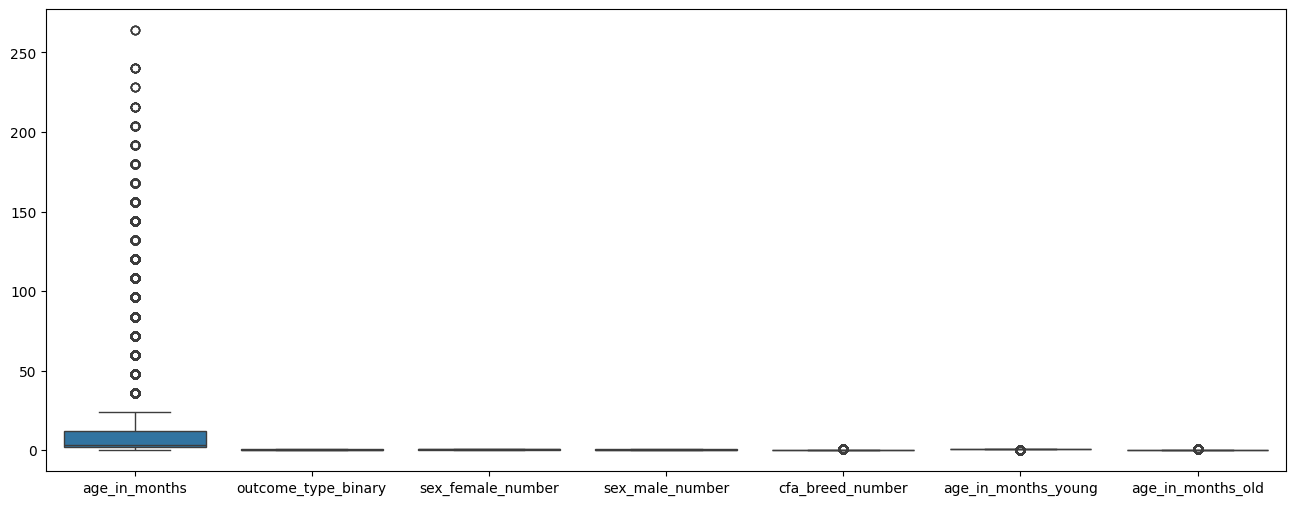

In [633]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = cat_outcomes_dropado)

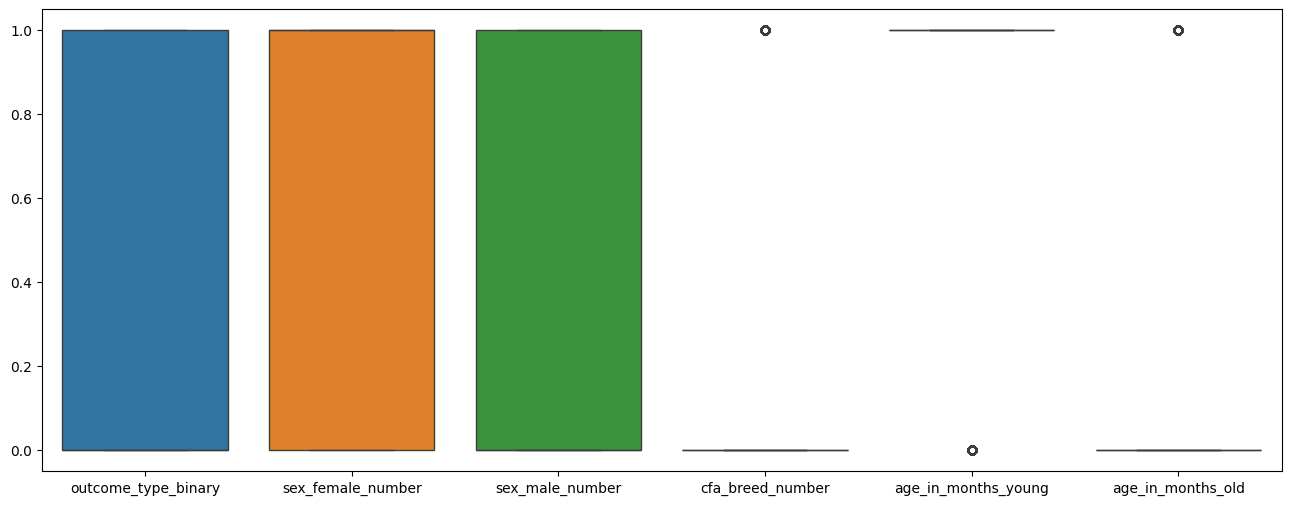

In [634]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = cat_outcomes_dropado2)

Text(0.5, 1.0, 'quantidade de animais com pedigree')

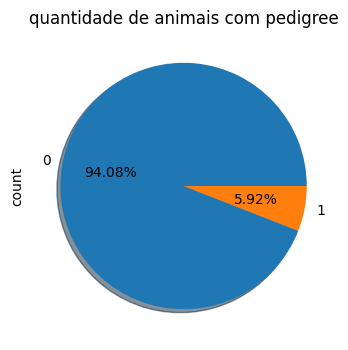

In [635]:
plt.figure(figsize = [4, 4], clear = True)
cat_outcomes_dropado2["cfa_breed_number"].value_counts().plot.pie( autopct='%1.2f%%', shadow = True);
plt.title("quantidade de animais com pedigree")

# PADRONIZANDO DADOS


In [636]:
obj_padronizacao = StandardScaler().fit(cat_outcomes_dropado)

In [637]:
df_padronizado = obj_padronizacao.transform(cat_outcomes_dropado)

In [638]:
df_padronizado

array([[-0.52432655, -0.87344016, -1.10656318, ..., -0.25094661,
         0.28554356, -0.28554356],
       [-0.4929006 ,  1.14489812,  0.90369896, ..., -0.25094661,
         0.28554356, -0.28554356],
       [-0.43004871,  1.14489812,  0.90369896, ..., -0.25094661,
         0.28554356, -0.28554356],
       ...,
       [-0.14721519, -0.87344016, -1.10656318, ..., -0.25094661,
         0.28554356, -0.28554356],
       [-0.33577087,  1.14489812,  0.90369896, ..., -0.25094661,
         0.28554356, -0.28554356],
       [-0.33577087,  1.14489812, -1.10656318, ..., -0.25094661,
         0.28554356, -0.28554356]])

In [639]:
# transformando para DataFrame e nomeando as colunas
df_padronizado = pd.DataFrame(df_padronizado)
df_padronizado.columns = ['age_in_months',
       'outcome_type_binary', 'sex_female_number', 'sex_male_number',
       'cfa_breed_number', 'age_in_months_young', 'age_in_months_old']

# visualizando os dados padronizados
df_padronizado.head()

,age_in_months,outcome_type_binary,sex_female_number,sex_male_number,cfa_breed_number,age_in_months_young,age_in_months_old
0,-0.524327,-0.873440,-1.106563,1.106563,-0.250947,0.285544,-0.285544
1,-0.492901,1.144898,0.903699,-0.903699,-0.250947,0.285544,-0.285544
2,-0.430049,1.144898,0.903699,-0.903699,-0.250947,0.285544,-0.285544
3,-0.147215,-0.873440,0.903699,-0.903699,-0.250947,0.285544,-0.285544
4,-0.524327,-0.873440,-1.106563,1.106563,-0.250947,0.285544,-0.285544


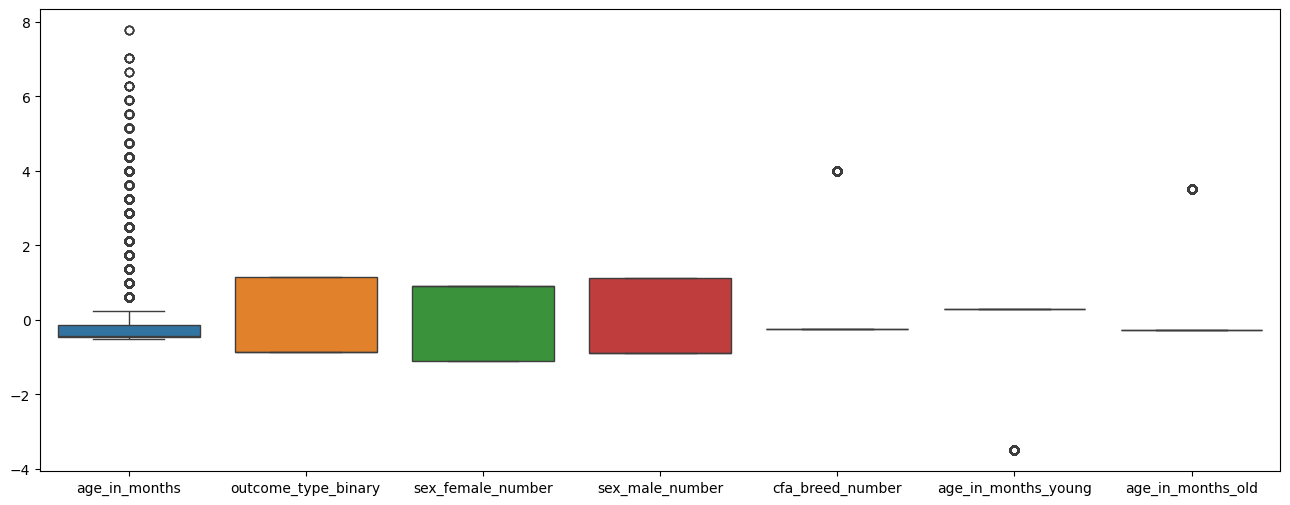

In [640]:
# Gerando os BoxPlot dos dados Padronizados
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado)

In [643]:
ocorrencia_0_e_1 = cat_outcomes_dropado['cfa_breed_number'].value_counts()
print(ocorrencia_0_e_1)

cfa_breed_number
0    27678
1     1743
Name: count, dtype: int64


In [644]:
# filtrando os registros com cfa_breed_number igual a 1 (indicando pedigree) e outcome_type igual a 'adopted'
pedigree_adotados = cat_outcomes_dropado[(cat_outcomes_dropado2['cfa_breed_number'] == 1) & (cat_outcomes_dropado['outcome_type_binary'] == 1)]
sem_pedigree_adotados = cat_outcomes_dropado[(cat_outcomes_dropado2['cfa_breed_number'] == 0) & (cat_outcomes_dropado['outcome_type_binary'] == 1)]
# contando o número de animais com pedigree que foram adotados
total_pedigree_adotados = pedigree_adotados.shape[0]
total_sem_pedigree_adotados = sem_pedigree_adotados.shape[0]

print("Total de animais com pedigree que foram adotados:", total_pedigree_adotados, "sem pedigree:", total_sem_pedigree_adotados )

Total de animais com pedigree que foram adotados: 823 sem pedigree: 11909


# NORMALIZANDO DADOS

In [641]:

obj_normalizacao = MinMaxScaler().fit(cat_outcomes_dropado)

In [642]:
# aplicando a NORMALIZAÇÃO
df_normalizado = obj_normalizacao.transform(cat_outcomes_dropado)

In [645]:
# mostrando dados normalizados
df_normalizado

array([[0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.00378788, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.01136364, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04545455, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02272727, 1.        , 1.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02272727, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [646]:
# transformando para DataFrame e nomeando as colunas
df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['_age_in_months',
       'outcome_type_binary', 'sex_female_number', 'sex_male_number',
       'cfa_breed_number', 'age_in_months_young', 'age_in_months_old']


# mostrando os dados NORMALIZADOS
df_normalizado.head()

,_age_in_months,outcome_type_binary,sex_female_number,sex_male_number,cfa_breed_number,age_in_months_young,age_in_months_old
0,0.000000,0.0,0.0,1.0,0.0,1.0,0.0
1,0.003788,1.0,1.0,0.0,0.0,1.0,0.0
2,0.011364,1.0,1.0,0.0,0.0,1.0,0.0
3,0.045455,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.0,0.0,1.0,0.0,1.0,0.0


In [647]:
# visualizando dados normalizados (medidas)
df_normalizado.describe()

,_age_in_months,outcome_type_binary,sex_female_number,sex_male_number,cfa_breed_number,age_in_months_young,age_in_months_old
count,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000,29421.000000
mean,0.063199,0.432752,0.550457,0.449543,0.059243,0.924612,0.075388
std,0.120536,0.495466,0.497456,0.497456,0.236084,0.264021,0.264021
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.007576,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.011364,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.045455,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


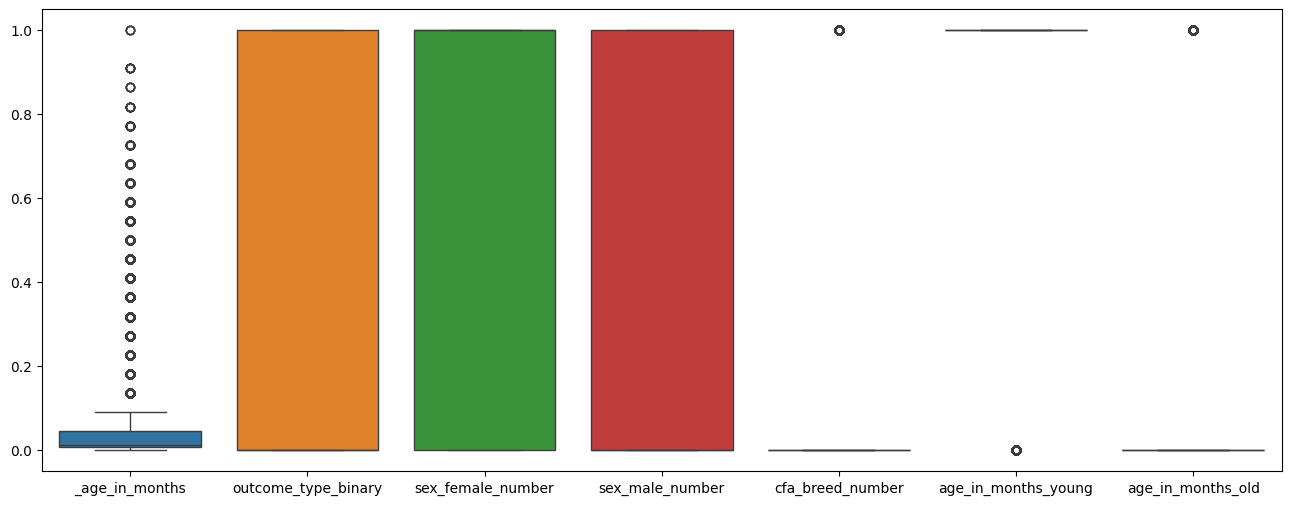

In [648]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

In [649]:
# contar a quantidade de ocorrências dos valores 0 e 1 na coluna 'cfa_breed_number'
quantidade_0 = (cat_outcomes_dropado['cfa_breed_number'] == 0).sum()
quantidade_1 = (cat_outcomes_dropado['cfa_breed_number'] == 1).sum()

# mostrar a quantidade de ocorrências
print("Quantidade de ocorrências de 0 em breed:", quantidade_0)
print("Quantidade de ocorrências de 1 em breed:", quantidade_1)

# contar a quantidade de ocorrências dos valores 0 e 1 na coluna 'cfa_breed_number'
quantidade_0 = (cat_outcomes_dropado['sex_female_number'] == 0).sum()
quantidade_1 = (cat_outcomes_dropado['sex_female_number'] == 1).sum()

# mostrar a quantidade de ocorrências
print("Quantidade de ocorrências de 0 em femea:", quantidade_0)
print("Quantidade de ocorrências de 1 em femea:", quantidade_1)



Quantidade de ocorrências de 0 em breed: 27678
Quantidade de ocorrências de 1 em breed: 1743
Quantidade de ocorrências de 0 em femea: 13226
Quantidade de ocorrências de 1 em femea: 16195


###KNN

##Com variáveis normalizadas

In [650]:
VAR_PREDITORAS_NORM = df_normalizado.drop('outcome_type_binary', axis = 1)

In [651]:
VAR_TARGET = cat_outcomes_dropado['outcome_type_binary']

In [652]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 10)

In [653]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [654]:
resultados = knn.predict(X_test)

In [655]:
score = accuracy_score(Y_test, resultados)

In [656]:
score

0.7370567576753144

##Com variaveis padronizadas

In [657]:
VAR_PREDITORAS_PADRON = df_padronizado.drop('outcome_type_binary', axis = 1)

In [658]:
VAR_TARGET = cat_outcomes_dropado['outcome_type_binary']

In [659]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 10)

In [660]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [661]:
resultados = knn.predict(X_test)

In [662]:
score = accuracy_score(Y_test, resultados)

In [663]:
score

0.7417015973717005

In [664]:
# convertendo pra float
cfa_breed_number = float(0.0)
age_in_months = float(0.011364)
sex_female_number = float(1.0)
sex_male_number = float(0.0)
age_in_months_young = float(1.0)
age_in_months_old = float (0.0)

# valores de entrada
X_novo = pd.DataFrame([[age_in_months, sex_female_number, sex_male_number, cfa_breed_number, age_in_months_young, age_in_months_old ]], columns=['age_in_months', 'sex_female_number', 'sex_male_number', 'cfa_breed_number', 'age_in_months_young', 'age_in_months_old'])



# previsões
Y_previsto = knn.predict(X_novo)

# mostrar previsão
print("A previsão para outcome_type_binary é:", Y_previsto[0])


A previsão para outcome_type_binary é: 0


#SVM

##Variáveis normalizadas

In [665]:
VAR_PREDITORAS_ORIG = df_normalizado.drop('outcome_type_binary', axis = 1)

In [666]:
VAR_TARGET = cat_outcomes_dropado['outcome_type_binary']

In [667]:
#testando com strayify
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_NORM, VAR_TARGET, test_size = 0.3, random_state = 10)

In [668]:
svm = svm.SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [669]:
resultados = svm.predict(X_test)

In [670]:
score = accuracy_score(Y_test, resultados)

In [671]:
score

0.5603262716664779

##Variáveis padronizadas

In [672]:
VAR_PREDITORAS_PADRON = df_padronizado.drop('outcome_type_binary', axis = 1)

In [673]:
VAR_TARGET = cat_outcomes_dropado['outcome_type_binary']

In [674]:
X_train, X_test, Y_train, Y_test = train_test_split(VAR_PREDITORAS_PADRON, VAR_TARGET, test_size = 0.3, random_state = 10)

In [675]:
svm = svm
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [676]:
score - accuracy_score(Y_test, resultados)

0.0

In [677]:
score

0.5603262716664779